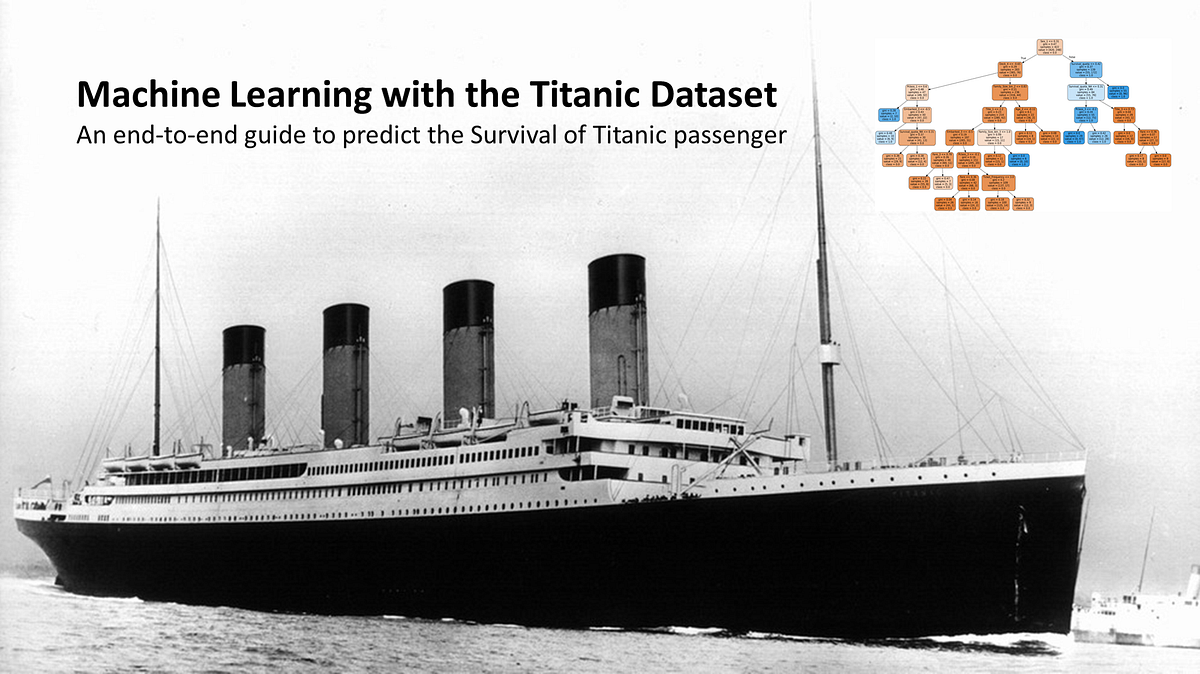

In [1]:
# Import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# select features
Features = ['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked','Survived']
df = df[Features]
df.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [7]:
# drop null values
df.dropna(inplace=True)
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [8]:
# duplicates
df.duplicated().sum()

np.int64(38)

In [9]:
# drop the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

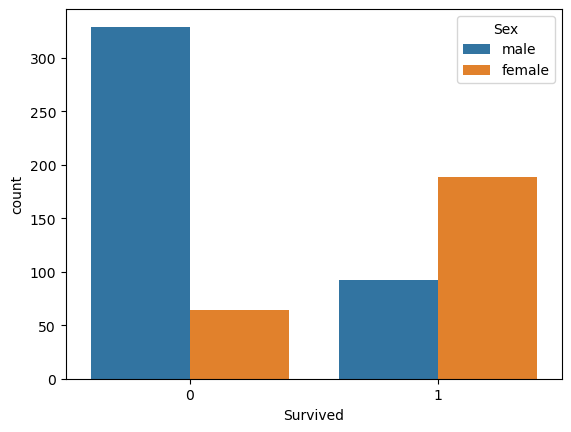

In [10]:
sns.countplot(x=df['Survived'],hue=df["Sex"])
plt.show()

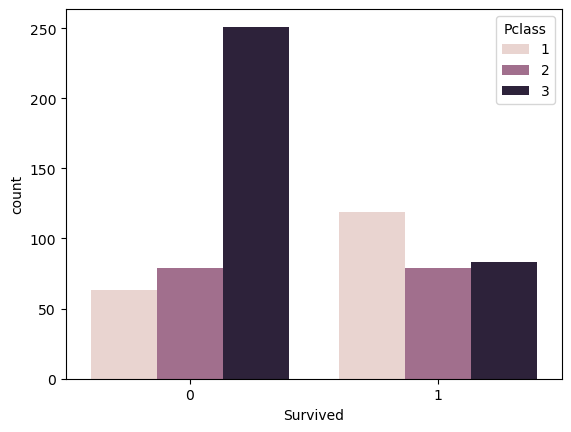

In [11]:
sns.countplot(x=df['Survived'],hue=df["Pclass"])
plt.show()

In [12]:
df.shape

(674, 8)

In [13]:
# Independent Features
x=df.drop("Survived",axis=1)
x.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [14]:
# Dependent Features 
y=df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
# Split the Data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((539, 7), (135, 7), (539,), (135,))

In [16]:
# column transformation 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


num_features=['Pclass','Age','SibSp','Parch','Fare']
cat_features=['Sex','Embarked']
num_transformer=StandardScaler()# standardization for numerical features
cat_transformer=OneHotEncoder()# one-hot encoding for categorical features
preprocessor=ColumnTransformer(
    transformers=[
        ('num',num_transformer,num_features),
        ('cat',cat_transformer,cat_features)

    ]
)

In [17]:
#pipeline

from sklearn.ensemble import RandomForestClassifier
pipe_RF= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
])
pipe_RF.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('model', RandomForestClassifier())])

In [18]:
#use model for prediction pn user input with pipeline
sample_data = pd.DataFrame([{'Pclass': 3,
                             'Sex':'male',
                             'Age': 25,
                             'SibSp': 0,
                             'Parch': 0,
                             'Fare': 107.5,
                             'Embarked':'S'}])
pipe_RF.predict(sample_data)

array([0])

In [19]:
#save pipeline
import joblib
joblib.dump(pipe_RF,'titanic_pipeline.pkl')

['titanic_pipeline.pkl']

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
#apply pipeline for different models
model={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name,model in model.items():
    pipe_model = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',model)
    ])
    pipe_model.fit(x_train,y_train)
    y_pred=pipe_model.predict(x_test)
    print(name)
    print("Accuracy:",round(accuracy_score(y_test,y_pred)*100))

Logistic Regression
Accuracy: 84
Decision Tree
Accuracy: 74
Random Forest
Accuracy: 84
Support Vector Machine
Accuracy: 83


In [23]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('lr', LogisticRegression()),
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ],
    voting='soft'  
)
vote_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('voting_clf',voting_clf)
])
vote_pipeline.fit(x_train,y_train)
Accuracy = round(accuracy_score(y_test,y_pred)*100)
Accuracy


83

In [24]:
#gridsearch with pipeline
from sklearn.model_selection import GridSearchCV
param_grid = {
    'Classifier' : [
        DecisionTreeClassifier(),
        LogisticRegression(),
        SVC(),
        RandomForestClassifier()
    ]
}
Pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('Classifier',RandomForestClassifier())
])
grid = GridSearchCV(Pipeline,param_grid, cv=5)
grid.fit(x_train,y_train)

print("Best Model:",grid.best_estimator_)
print("Best Score:",grid.best_score_)
print("Best parameter:",grid.best_params_)

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('Classifier', SVC())])
Best Score: 0.8014710972654898
Best parameter: {'Classifier': SVC()}


In [25]:
#save gridsearch model
import joblib
joblib.dump(grid.best_estimator_,'gridsearch_model.pkl')

['gridsearch_model.pkl']